In [77]:
import numpy as np
import pandas as pd
import re
import itertools
from collections import Counter
import pickle
import jieba
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Read the Dataset

In [273]:
data = pd.read_csv('./online_shopping_10_cats.csv')
data = data[['cat', 'review']] # in this practice we only need the category and review text, so just keep this two
data.sample(10) # get a sample to take a look at the dataset

,cat,review
7654,平板,非常好，京东物流品质没话说
14374,手机,CPU处理速度真快，软件丰富，强机！
44887,衣服,味道不是一般大，还会掉色，差差差差差差
33423,洗发水,和我之前买的瓶子颜色不一样，味道也不一样
56872,酒店,"酒店附近修路,出行比较痛苦.服务还是一如既往的好.偶尔去了趟健身房,觉得好小叻,设备都挤在一..."
18083,水果,包装极好，苹果很脆，很甜，很好吃，实惠，京东送货超快，超赞的!
24542,水果,买了两次潘苹果，都是花牛，一次是面面的，水分少，这次是红富士，口感一般般，这个所谓的海拔10...
15584,手机,可惜，键盘不耐磨，短信息每隔一段时间就会自动清零（这点特别可气），用了不到一年，屏幕也出现问...
39739,衣服,宝贝收到了，包装很精致，老公穿大小合适，做工精细，质量不错，非常满意。
15053,手机,质量不好，用了半年不到屏幕烧了，而且容易破，我的朋友也和我一样屏幕破了，而且修修贵的要命，一...


# Data Preprocess

In [274]:
data.groupby('cat').count()

,review
cat,
书籍,3851
平板,10000
手机,2323
水果,10000
洗发水,10000
热水器,574
蒙牛,2033
衣服,10000
计算机,3992


In [60]:
def clean_review(text):
    remove_symbol = re.sub(r"[\s\/\\_$^*(+\"\'+~\-@#&^*\[\]{}【】]+", "", str(text))
    remove_num = re.sub(r"\d*\.\d*%?|\d+%?", "", remove_symbol)
    remove_char = re.sub(r"[a-zA-Z]+", "", remove_num)
    return remove_char

In [275]:
data['review'] = data.review.apply(clean_review)

In [276]:
review_length = data.review.apply(lambda x: len(str(x)))

{'whiskers': [<matplotlib.lines.Line2D at 0x11d05d898>,
 'caps': [<matplotlib.lines.Line2D at 0x57129e550>,
 'boxes': [<matplotlib.lines.Line2D at 0x11d05d4a8>],
 'medians': [<matplotlib.lines.Line2D at 0x57129ee10>],
 'fliers': [<matplotlib.lines.Line2D at 0x56d7152b0>],
 'means': []}

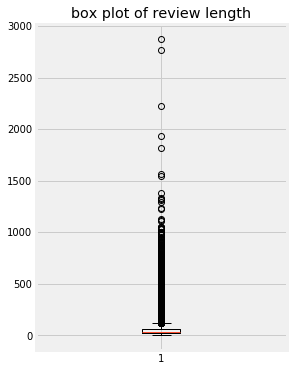

In [277]:
plt.figure(figsize=[4,6])
plt.title('box plot of review length')
plt.boxplot(review_length)

In [278]:
review_length.describe()

count    62774.000000
mean        55.450330
std         74.516073
min          0.000000
25%         20.000000
50%         33.000000
75%         60.000000
max       2876.000000
Name: review, dtype: float64

In [279]:
data.iloc[review_length.idxmin()].review # minimum review

''

In [280]:
data.iloc[review_length.idxmax()].review # maximum review

'《聊斋》遗风，《围城》神韵——《场客》新书发布暨作品研讨会纪要中国作协创研部主任雷达：今天呢，山东的文学界的评论家都来了，都认识，非常高兴有机会参加这次研讨会。拿到这本书，我一直在路上出差，没有完整地看完，但大体对作品的形态、格调还是基本掌握，所以我说一点浅见：我觉得这是一部奇特的、面貌陌生而又新鲜的作品。作品带有一定的喜剧风格，甚至是闹剧风格，全书充满了反讽、嘲笑、揶揄，把日常生活夸大到荒诞，把小纠纷渲染成大灾难，非常小题大做。作者要干什么。他极端写实，采用象征手法，从事件、故事、人物、话语，都不按常规出牌，想怎么写就怎么写。首先看他的话语是十分膨胀的，充满了对社会人生一肚皮的牢骚，可以说是牢骚，也可以说是看法和见解。很多东西我们平常看不细，比如他写两个女人打架，那一段他写的多细啊。一开始就写两个女人打架，后来成了整部作品情节的发动机。表面上看，这是一场闹剧，但透过闹剧的荒诞和变形，体现出了作者对人生的体味，对日常生活所蕴育的哲理的深刻思考，还是具有一定的典型意义。我们这个时代是一个欲望膨胀的时代，权欲、金钱欲、性欲、支配欲、爆发欲等等，这部作品对市场经济条件下人们的各种欲望进行了描绘，它又不同于以往作品对官场、情场、职场的集中单一描写。比如说，韦公元这个人物，他是个得道的土鳖，是个农民企业家，他不是官；说他是民，他也不是民。还有书中的女主人公等其他人物形象都有其身份的复杂性。这部作品对社会上三教九流、五行八作、形形色色的人物都进行了描写，写他们利欲熏心、不择手段，可以说是把卑鄙的卑鄙撕得更加彻底。作者的想象力十分丰富，比如，在写洗浴城场景时，每个人都戴着面具，有狗头的，有虎头的等等，我问他这是真地的吗？真有这些面具，他说是自己想象出来的。我说想象得很好，这就是对生活的一种合理想象。这部书不是弘扬正面价值，描写社会的真善美，而是揭露和批判国民的劣根性，没有明亮、昂扬、诗意的调子，而是写人的利欲熏心、勾心斗角、你争我夺。它不是写官场，写官员，它是个泛欲望化的东西。这可能就是全民精神素质的现状，一些腐恶的、消极的、利欲熏心的东西比较普遍，作者通过这些看到了市场经济条件下人性的堕落。这部作品与日常写作的原生态不同，作者不拘泥于日常生活的油盐酱醋，加入了夸张、变形、荒诞等多种艺术手法。比如他写广场，广场不是大城市，它是城乡交叉处，它是信息集散地，这就是作者写的广场。它是

In [284]:
review_length.quantile(0.90)

123.0

90% of the reviews are less than 123 characters, so I just kept those reviews. And too short reviews do not make much sense, I also left them out

In [285]:
data = data[data.review.apply(lambda x: 3 < len(str(x)) < 123)]

In [70]:
data['words'] = data.review.apply(jieba.lcut)

In [179]:
data = data.loc[data.words.apply(lambda x: len(x) != 0)]

In [242]:
data.sample(10)

,cat,review,words
24833,水果,太小了，与描述不符，还烂了二个。,"[太小, 了, ，, 与, 描述, 不符, ，, 还烂, 了, 二个, 。]"
20703,水果,苹果很棒很新鲜快递小哥也很给力五星好评,"[苹果, 很棒, 很, 新鲜, 快递, 小哥, 也, 很, 给, 力, 五星, 好评]"
28956,洗发水,快递很快就到了，早上九点下单，下午四点就到了。香味好香，不知道是不是正品,"[快递, 很快, 就, 到, 了, ，, 早上, 九点, 下单, ，, 下午, 四点, 就,..."
38355,蒙牛,无良蒙牛会遭报应的无,"[无良, 蒙牛, 会, 遭报应, 的, 无]"
26420,洗发水,京东自营值得信赖！正品！满减好划算啊！小瓶的还可以出差，旅游用！,"[京东, 自营, 值得, 信赖, ！, 正品, ！, 满减, 好, 划算, 啊, ！, 小瓶..."
28545,洗发水,包装太简陋了，里面没有任何缓冲的，很容易就会破了，味道挺好闻的，希望以后包装有所改进,"[包装, 太, 简陋, 了, ，, 里面, 没有, 任何, 缓冲, 的, ，, 很, 容易,..."
26569,洗发水,还可以，一次买了个！非常实惠的赞一个,"[还, 可以, ，, 一次, 买, 了, 个, ！, 非常, 实惠, 的, 赞, 一个]"
6194,平板,特意用了好多天才来评价，待机时间很长，我买来看电视用的，很满意,"[特意, 用, 了, 好多, 天才, 来, 评价, ，, 待机时间, 很长, ，, 我, 买..."
7944,平板,还可以吧。毕竟安卓平板都是差不多。音质确实没的说。只不过感觉就是个大手机而已。,"[还, 可以, 吧, 。, 毕竟, 安卓, 平板, 都, 是, 差不多, 。, 音质, 确实..."
61510,酒店,各方面很差，就是离机场近。,"[各, 方面, 很差, ，, 就是, 离, 机场, 近, 。]"


# Build Dataset

In [79]:
from sklearn.model_selection import train_test_split

In [181]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [140]:
id_tag = {idx: tag for idx, tag in enumerate(data.groupby('cat').count().index)}
tag_id = {v: k for k, v in id_tag.items()}

In [141]:
id_tag

{0: '书籍',
 1: '平板',
 2: '手机',
 3: '水果',
 4: '洗发水',
 5: '热水器',
 6: '蒙牛',
 7: '衣服',
 8: '计算机',
 9: '酒店'}

In [187]:
train['tag'] = train.cat.apply(lambda x: tag_id[x])
test['tag'] = test.cat.apply(lambda x: tag_id[x])

/Users/licor/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/licor/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [254]:
y_train = train.tag.tolist()
y_test = test.tag.tolist()

# Bag of Word Features

In [251]:
# First create a dictionary of words from training data
word_counter = Counter([x for y in train.words.tolist() for x in y])

# Assign unique id to every word, start from the most frequent one
id_word_dict = {idx+1: item[0] for idx, item in enumerate(word_counter.most_common())}
id_word_dict[0] = 'UNK'
word_id_dict = {word: idx for idx, word in id_word_dict.items()}

In [252]:
train['word_id'] = train.words.apply(lambda x: [word_id_dict.get(word) for word in x])
test['word_id'] = test.words.apply(lambda x: [word_id_dict.get(word) for word in x])

/Users/licor/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/licor/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [253]:
X_train_bow = np.zeros([len(train), len(id_word_dict)])
for idx, words in enumerate(train.word_id.tolist()):
    for w in words:
        X_train_bow[idx][w] += 1
        
X_test_bow = np.zeros([len(test), len(id_word_dict)])
for idx, words in enumerate(test.word_id.tolist()):
    for w in words:
        X_test_bow[idx][w] += 1

In [153]:
from sklearn.metrics import accuracy_score

def train_model(classifier, train_data, train_y, test_data, test_y):
    classifier.fit(train_data, train_y)
    predictions = classifier.predict(test_data)
    return accuracy_score(predictions, test_y)

In [259]:
train_model(MultinomialNB(), X_train_bow, y_train, X_test_bow, y_test)

0.6351315439808664

# TF-IDF Features

In [201]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [' '.join(item) for item in train.words.tolist()]

tfidf = TfidfVectorizer()
tfidf.fit(corpus)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [202]:
X_train_tfidf = tfidf.transform([' '.join(item) for item in train.words.tolist()])
X_test_tfidf = tfidf.transform([' '.join(item) for item in test.words.tolist()])

In [203]:
train_model(MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)

0.7954646115687838

# BERT Encoding Features

In [159]:
from bert_serving.client import BertClient
bc = BertClient()

In [184]:
X_train_bert = bc.encode(train.review.tolist())
X_test_bert = bc.encode(test.review.tolist())

In [206]:
# The encoding process cost some time, save the encodings to file for convenience
import pickle
with open('bert_encode.pkl', 'wb') as f:
    pickle.dump((X_train_bert, X_test_bert, train, test), f)

In [260]:
from keras.layers import Input, MaxPooling1D, Flatten, Dense
from keras.models import Model

In [261]:
input_size = X_train_bert.shape[1]

In [265]:
input_layer = Input(shape=(input_size,))
hidden_layer = Dense(100, activation="relu")(input_layer)
output_layer = Dense(10, activation="softmax")(hidden_layer)

model = Model(input_layer, output_layer)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [266]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 768)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               76900     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 77,910
Trainable params: 77,910
Non-trainable params: 0
_________________________________________________________________


In [268]:
from keras.utils import to_categorical

In [270]:
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [271]:
model.fit(X_train_bert, y_train_onehot, batch_size=32, epochs=5)

Epoch 1/5
45155/45155 [==============================] - 3s 64us/step - loss: 0.5873 - acc: 0.7905
Epoch 2/5
 7712/45155 [===>..........................] - ETA: 1s - loss: 0.4525 - acc: 0.830

limit_output extension: Maximum message size of 10000 exceeded with 10075 characters

In [272]:
model.evaluate(X_test_bert, y_test_onehot)

11289/11289 [==============================] - 0s 31us/step


[0.4655078290924146, 0.8294800247923457]